In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, seaborn as sn, mpld3
import pandas as pd, imp, glob, os, numpy as np
from sqlalchemy import create_engine
sn.set_context('notebook')

# TOC trends October 2016 (part 2)

This notebook continues the work described [here](http://nbviewer.jupyter.org/github/JamesSample/icpw/blob/master/toc_trends_oct_2016.ipynb), where my latest trends code was modified and tested. My aim here is to use the code to generate trends results for three key periods of interest (see e-mail from Heleen 19/10/2016 at 10:24):

 * 1990-2012
 * 1990-2004
 * 1998-2012

as well as creating a fourth set of results using all of the data available for each site. This latter set of results will hopefully help to identify any further obvious data issues (strange values etc.).

## 1. Import functions and specify user input

In [60]:
# Import custom functions
# Connect to db
resa2_basic_path = (r'C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\Upload_Template'
                    r'\useful_resa2_code.py')

resa2_basic = imp.load_source('useful_resa2_code', resa2_basic_path)

engine, conn = resa2_basic.connect_to_resa2()

# Import code for trends analysis
resa2_trends_path = (r'C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\TOC_Trends_Analysis_2015'
                     r'\Python\icpw\toc_trends_analysis.py')

resa2_trends = imp.load_source('toc_trends_analysis', resa2_trends_path)

In [3]:
# User input
# Specify projects of interest
proj_list = ['ICPW_TOCTRENDS_2015_CA_ATL',
             'ICPW_TOCTRENDS_2015_CA_DO',
             'ICPW_TOCTRENDS_2015_CA_ICPW',
             'ICPW_TOCTRENDS_2015_CA_NF',
             'ICPW_TOCTRENDS_2015_CA_QU',
             'ICPW_TOCTRENDS_2015_CZ',
             'ICPW_TOCTRENDS_2015_Cz2',
             'ICPW_TOCTRENDS_2015_FI',
             'ICPW_TOCTRENDS_2015_NO',
             'ICPW_TOCTRENDS_2015_SE',
             'ICPW_TOCTRENDS_2015_UK',
             'ICPW_TOCTRENDS_2015_US_LTM',
             'ICPWaters Ca']

# Specify results folder
res_fold = (r'C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\TOC_Trends_Analysis_2015'
            r'\Results')

## 2. 1990 to 2012

In [4]:
# Run analysis

# Specify period of interest
st_yr, end_yr = 1990, 2012

# Build output paths
plot_fold = os.path.join(res_fold, 'trends_plots_%s-%s' % (st_yr, end_yr))
res_csv = os.path.join(res_fold, 'res_%s-%s.csv' % (st_yr, end_yr))
dup_csv = os.path.join(res_fold, 'dup_%s-%s.csv' % (st_yr, end_yr))
nd_csv = os.path.join(res_fold, 'nd_%s-%s.csv' % (st_yr, end_yr))

# Run analysis 
res_df, dup_df, nd_df = resa2_trends.run_trend_analysis(proj_list, engine,
                                                        st_yr=st_yr, end_yr=end_yr,
                                                        plot=True, fold=plot_fold)

# Delete mk_std_dev col as not relevant here
del res_df['mk_std_dev']

# Write output
res_df.to_csv(res_csv, index=False)
dup_df.to_csv(dup_csv, index=False)
nd_df.to_csv(nd_csv, index=False)

Extracting data from RESA2...
    The database contains duplicate values for some station-date-parameter combinations.
    Only the most recent values will be used, but you should check the repeated values are not errors.
    The duplicated entries are returned in a separate dataframe.

    Some stations have no relevant data in the period specified. Their IDs are returned in a separate dataframe.

    Done.

Converting units and applying sea-salt correction...
    Done.

Calculating statistics...
    Data series for Al at site 101 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 102 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 103 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 104 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 119 has fewer than

# 3. 1990 to 2004

In [5]:
# Run analysis

# Specify period of interest
st_yr, end_yr = 1990, 2004

# Build output paths
plot_fold = os.path.join(res_fold, 'trends_plots_%s-%s' % (st_yr, end_yr))
res_csv = os.path.join(res_fold, 'res_%s-%s.csv' % (st_yr, end_yr))
dup_csv = os.path.join(res_fold, 'dup_%s-%s.csv' % (st_yr, end_yr))
nd_csv = os.path.join(res_fold, 'nd_%s-%s.csv' % (st_yr, end_yr))

# Run analysis 
res_df, dup_df, nd_df = resa2_trends.run_trend_analysis(proj_list, engine,
                                                        st_yr=st_yr, end_yr=end_yr,
                                                        plot=True, fold=plot_fold)

# Delete mk_std_dev col as not relevant here
del res_df['mk_std_dev']

# Write output
res_df.to_csv(res_csv, index=False)
dup_df.to_csv(dup_csv, index=False)
nd_df.to_csv(nd_csv, index=False)

Extracting data from RESA2...
    The database contains duplicate values for some station-date-parameter combinations.
    Only the most recent values will be used, but you should check the repeated values are not errors.
    The duplicated entries are returned in a separate dataframe.

    Some stations have no relevant data in the period specified. Their IDs are returned in a separate dataframe.

    Done.

Converting units and applying sea-salt correction...
    Done.

Calculating statistics...
    Data series for Al at site 23456 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 23457 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 23458 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 23459 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 23460 has 

# 4. 1998 to 2012

In [6]:
# Run analysis

# Specify period of interest
st_yr, end_yr = 1998, 2012

# Build output paths
plot_fold = os.path.join(res_fold, 'trends_plots_%s-%s' % (st_yr, end_yr))
res_csv = os.path.join(res_fold, 'res_%s-%s.csv' % (st_yr, end_yr))
dup_csv = os.path.join(res_fold, 'dup_%s-%s.csv' % (st_yr, end_yr))
nd_csv = os.path.join(res_fold, 'nd_%s-%s.csv' % (st_yr, end_yr))

# Run analysis 
res_df, dup_df, nd_df = resa2_trends.run_trend_analysis(proj_list, engine,
                                                        st_yr=st_yr, end_yr=end_yr,
                                                        plot=True, fold=plot_fold)

# Delete mk_std_dev col as not relevant here
del res_df['mk_std_dev']

# Write output
res_df.to_csv(res_csv, index=False)
dup_df.to_csv(dup_csv, index=False)
nd_df.to_csv(nd_csv, index=False)

Extracting data from RESA2...
    The database contains duplicate values for some station-date-parameter combinations.
    Only the most recent values will be used, but you should check the repeated values are not errors.
    The duplicated entries are returned in a separate dataframe.

    Some stations have no relevant data in the period specified. Their IDs are returned in a separate dataframe.

    Done.

Converting units and applying sea-salt correction...
    Done.

Calculating statistics...
    Data series for Al at site 101 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 102 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 103 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 104 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 119 has fewer than

# 5. All data

In [7]:
# Run analysis

# Specify period of interest
st_yr, end_yr = None, None

# Build output paths
plot_fold = os.path.join(res_fold, 'trends_plots_all_years')
res_csv = os.path.join(res_fold, 'res_all_years.csv')
dup_csv = os.path.join(res_fold, 'dup_all_years.csv')
nd_csv = os.path.join(res_fold, 'nd_all_years.csv')

# Run analysis 
res_df, dup_df, nd_df = resa2_trends.run_trend_analysis(proj_list, engine,
                                                        st_yr=st_yr, end_yr=end_yr,
                                                        plot=True, fold=plot_fold)

# Delete mk_std_dev col as not relevant here
del res_df['mk_std_dev']

# Write output
res_df.to_csv(res_csv, index=False)
dup_df.to_csv(dup_csv, index=False)
nd_df.to_csv(nd_csv, index=False)

Extracting data from RESA2...
    The database contains duplicate values for some station-date-parameter combinations.
    Only the most recent values will be used, but you should check the repeated values are not errors.
    The duplicated entries are returned in a separate dataframe.

    Some stations have no relevant data in the period specified. Their IDs are returned in a separate dataframe.

    Done.

Converting units and applying sea-salt correction...
    Done.

Calculating statistics...
    Data series for Al at site 101 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 102 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 103 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 104 has fewer than 10 non-null values. Significance estimates may be unreliable.
    Data series for Al at site 107 has fewer than

## 6. Basic checking

### 6.1. Boxplots

As a very basic check, let's create boxplots showing the long-term mean for each parameter at each site (i.e. each datapoint is the mean of all the annual means for a particular parameter at a single site). This should help identify any really extreme values that need further checking and cleaning. Note the following:

 * All values are in $\mu eq/l$, except for Al and TOC, which have units of $\mu g/l$ and $mgC/l$, respectively. <br><br>
 
 * The "whiskers" on the boxplots extend from the minimum to the maximum values in each dataset (i.e. they show the full data range, not a percentile interval or a multiple of the IQR).

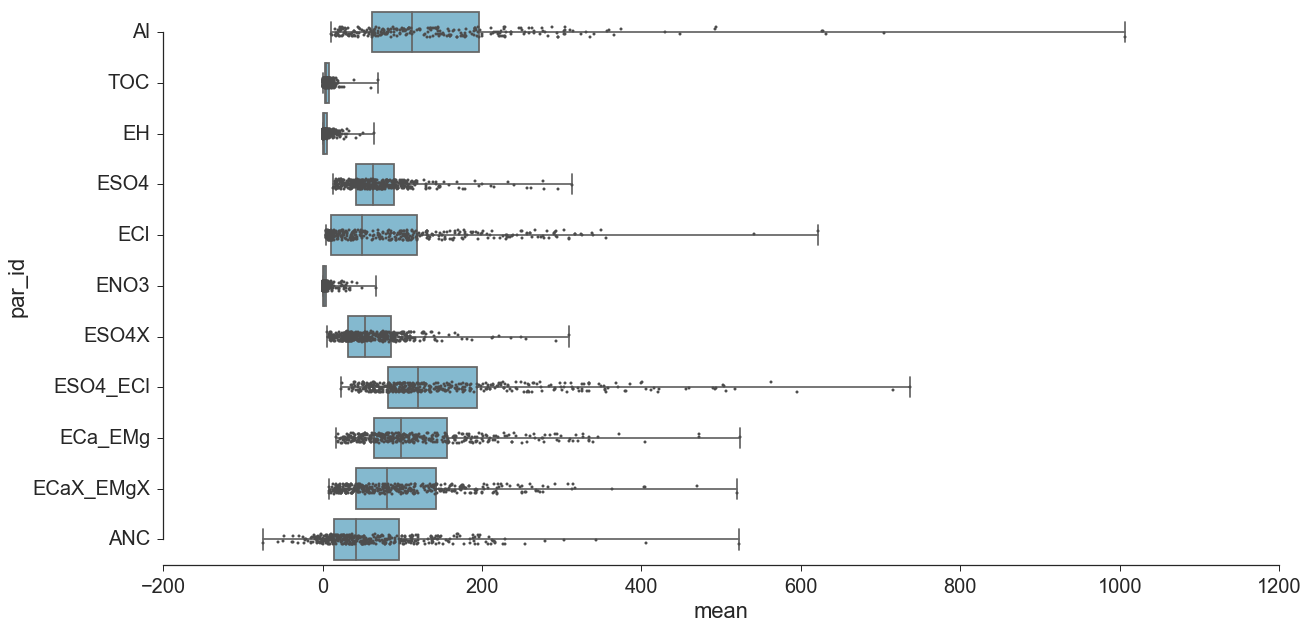

In [10]:
# Set up plot
fig = plt.figure(figsize=(20,10))
sn.set(style="ticks", palette="muted", 
       color_codes=True, font_scale=2)

# Horizontal boxplots
ax = sn.boxplot(x="mean", y="par_id", data=res_df,
                whis=np.inf, color="c")

# Add "raw" data points for each observation, with some "jitter"
# to make them visible
sn.stripplot(x="mean", y="par_id", data=res_df, jitter=True, 
             size=3, color=".3", linewidth=0)

# Remove axis lines
sn.despine(trim=True)

### 6.2. Map visualisation

As a further check, I'd like to build an updated map visualisation incorporating all of the results produced above. This requires some merging of the results files created above. I've also manually exported the basic station properties for all the sites associated with the 13 RESA2 projects chosen for this analysis. This file can be found here:

C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\TOC_Trends_Analysis_2015\Results\trends_sites_oct_2016.xlsx

Note the information in the `readme` sheet, which explains that **there are 431 sites with data in the selected projects**. This is less than in the previous analysis and perhaps less than Heleen was expecting (?). **Do we need to review the list of projects under consideration?**

In [16]:
# Read results files and concatenate
# Container for data
df_list = []

# Loop over periods
for per in ['1990-2012', '1990-2004', '1998-2012', 'all_years']:
    res_path = os.path.join(res_fold, 'trends_results_%s.xlsx' % per)
    df = pd.read_excel(res_path, sheetname='res_%s' % per)
    df_list.append(df)
    
# Concat
df = pd.concat(df_list, axis=0)

# Read station data
stn_path = os.path.join(res_fold, 'trends_sites_oct_2016.xlsx')
stn_df = pd.read_excel(stn_path, sheetname='data')

# Join
df = pd.merge(df, stn_df, how='left', on='station_id')

# Re-order columns
df = df[['station_id', 'station_name', 'station_code', 'nfc_code','country', 
         'lat', 'lon', 'analysis_period', 'data_period', 'par_id',
         'non_missing', 'mean', 'median', 'std_dev', 'mk_stat', 'norm_mk_stat', 
         'mk_p_val', 'trend', 'sen_slp']]

df.head()

,station_id,station_name,station_code,nfc_code,country,lat,lon,analysis_period,data_period,par_id,non_missing,mean,median,std_dev,mk_stat,norm_mk_stat,mk_p_val,trend,sen_slp
0,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,Al,1,276.433655,276.433655,NaN,NaN,NaN,NaN,NaN,NaN
1,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,TOC,21,6.146667,6.000000,1.184066,111.0,3.326214,8.803429e-04,increasing,0.116569
2,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,EH,21,10.500100,9.772372,3.596191,-119.0,-3.568121,3.595511e-04,decreasing,-0.380255
3,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,ESO4,21,35.188492,29.166667,15.103219,-173.0,-5.200989,1.982305e-07,decreasing,-2.051373
4,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,ECl,21,18.272109,17.142857,3.824173,-107.0,-3.221999,1.272998e-03,decreasing,-0.351074


I have uploaded all the trends plots to our web-hosting platform in the following folder:

    http://77.104.141.195/~icpwater/wp-content/trends_plots
    
In order to display these on my map, I need to build a column containing direct links to each of these files. 

I also need to add a column defining colours for the three `trend` types.

Finally, I'm going to drop rows where `non_missing = 0 or 1`, as this implies there's not enough data to calculate any summary statistics.

In [17]:
def assign_colour(row):
    if row['trend'] == 'increasing':
        return 'small_red'
    elif row['trend'] == 'decreasing':
        return 'small_green'
    else:
        return 'small_yellow'

def build_path(row):
    base = r'http://77.104.141.195/~icpwater/wp-content/trends_plots/'
    
    # Get row properties
    an_per = row['analysis_period']
    stn = row['station_id']
    par = row['par_id']
    da_per = row['data_period']
    
    # Make path
    full_path = os.path.join(base, 
                             'trends_plots_%s' % an_per,
                             '%s_%s_%s.png' % (stn, par, da_per))
    
    return full_path   
        
        
# Add symbol column
df['symbol'] = df.apply(assign_colour, axis=1)

# Build path to plots
df['link'] = df.apply(build_path, axis=1)

# Filter results
df = df.query('(non_missing != 0) and (non_missing != 1)')

# Save
out_path = os.path.join(res_fold, 'data_vis_all.csv')
df.to_csv(out_path, index=False, encoding='utf-8')

df.head()

,station_id,station_name,station_code,nfc_code,country,lat,lon,analysis_period,data_period,par_id,...,mean,median,std_dev,mk_stat,norm_mk_stat,mk_p_val,trend,sen_slp,symbol,link
1,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,TOC,...,6.146667,6.000000,1.184066,111.0,3.326214,8.803429e-04,increasing,0.116569,small_red,http://77.104.141.195/~icpwater/wp-content/tre...
2,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,EH,...,10.500100,9.772372,3.596191,-119.0,-3.568121,3.595511e-04,decreasing,-0.380255,small_green,http://77.104.141.195/~icpwater/wp-content/tre...
3,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,ESO4,...,35.188492,29.166667,15.103219,-173.0,-5.200989,1.982305e-07,decreasing,-2.051373,small_green,http://77.104.141.195/~icpwater/wp-content/tre...
4,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,ECl,...,18.272109,17.142857,3.824173,-107.0,-3.221999,1.272998e-03,decreasing,-0.351074,small_green,http://77.104.141.195/~icpwater/wp-content/tre...
5,100,Breidlivatnet,623-603,NaN,Norway,59.977669,10.152037,1990-2012,1990-2012,ENO3,...,2.180272,2.000000,1.152995,74.0,2.206388,2.735684e-02,increasing,0.078759,small_red,http://77.104.141.195/~icpwater/wp-content/tre...


The workflow for creating the map is as follows:

 1. Run the trends code and the notebook cells above to create a CSV file that will form the basis of the Google Fusion Table (`data_vis_all.csv`). <br><br>
 
 2. Open a blank Excel workbook and choose `Data > From text` to import the CSV. Be sure to **set the encoding** to `65001: Unicode (utf-8)` and **set the column data types explicitly**, otherwise Excel will truncate some of the NFC site codes and the special characters in the station names won't reproduce properly. (NB: there are still some problems with special characters in the station names, because in many cases RESA2 is storing names that are already corrupted. I don't have time to fix this now - it's another database issue to add to the list. The workflow described here should faithfully reproduce whatever's in the database, which is the best I can do at present). Check the file looks OK (`data_vis_all-xlsx`). <br><br>
 
 3. Upload all the plots to SiteGround in the `wp-content/trends_plots` folder. This is done using the FileZilla FTP client. <br><br>
 
 4. Create a new Fusion Table and import the data. Make sure to **check the box to make the table downloadable, and make sure it's in a public folder** on Google Drive. Next, check the column types are correct. In particular, `lat` and `lon` need be set to define the locations and the `link` column needs to set to `Text > Link`. Then switch to map view, click `Change feature styles` and style the map based on the entires in the `symbol` column. Turn on the `Terrain` option in map view if you want to. <br><br>
 
 5. Click `Change info window` and modify how the pop-up information box is displayed. Entering something like this in the `Custom` tab is a good start:
 
        <center><h2>{par_id} at {station_name}, {country}</h2></center>
        <center><h2>{analysis_period}</h2></center>
        <center><table>
          <tr>
            <td><b>ICPW ID:</b></td>
            <td>{station_id}</td>
          </tr>
          <tr>
            <td><b>ICPW code:</b></td>
            <td>{station_code}</td>
          </tr>
          <tr>
            <td><b>NFC code:</b></td>
            <td>{nfc_code}</td>
          </tr>
          <tr>
            <td><b>Data period:</b></td>
            <td>{data_period}</td>
          </tr>
          <tr>
            <td><b>Number of years with data:</b></td>
            <td>{non_missing}</td>
          </tr>
          <tr>
            <td><b>Mean:</b></td>
            <td>{mean}</td>
          </tr>
          <tr>
            <td><b>Median:</b></td>
            <td>{median}</td>
          </tr>
          <tr>
            <td><b>Standard deviation:</b></td>
            <td>{std_dev}</td>
          </tr>
          <tr>
            <td><b>Normalised Mann-Kendall statistic:</b></td>
            <td>{norm_mk_stat}</td>
          </tr>
          <tr>
            <td><b>Mann-Kendall p-value:</b></td>
            <td>{mk_p_val}</td>
          </tr>
          <tr>
            <td><b>Trend:</b></td>
            <td>{trend}</td>
          </tr>
          <tr>
            <td><b>Theil-Sen slope:</b></td>
            <td>{sen_slp}</td>
          </tr>
        </table></center>

        <center><img src={link} height="250"></center>

 6. Follow the instructions in this Word document:
 
 C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\TOC_Trends_Analysis_2015\Python\Fusion tables tips.docx
 
 which describes adding the table to the Fusion Tables Layer Wizard and then modifying the subsequent JavaScript to add e.g. filter boxes, legends etc. Save the resulting code as an `.html` file and upload it to a suitable public location at SiteGround. <br><br>
 
 7. Link to you finished map by embedding the public path to your HTML file as an `iframe` in your webpage.
 
As of 21/10/2016, the finished page is [here](http://77.104.141.195/~icpwater/data/explore-data/).

## 7. Data restructuring

Heleen would like the output in a particular format - see e-mailed received 19/10/2016 at 10:24 for details. The code below reads the results files and restructures them.

In [68]:
# Read results files and concatenate
# Container for data
df_list = []

# Loop over periods
for per in ['1990-2012', '1990-2004', '1998-2012']:
    res_path = os.path.join(res_fold, 'trends_results_%s.xlsx' % per)
    df = pd.read_excel(res_path, sheetname='res_%s' % per)
    df_list.append(df)
    
# Concat
df = pd.concat(df_list, axis=0)

# Read station data
stn_path = os.path.join(res_fold, 'trends_sites_oct_2016.xlsx')
stn_df = pd.read_excel(stn_path, sheetname='data')

# Join
df = pd.merge(df, stn_df, how='left', on='station_id')

# Read projects table
sql = ('SELECT project_id, project_name '
       'FROM resa2.projects '
       'WHERE project_name in %s' % str(tuple(proj_list)))

proj_df = pd.read_sql_query(sql, engine)

# Get associated stations
sql = ('SELECT station_id, project_id '
       'FROM resa2.projects_stations '
       'WHERE project_id in %s' % str(tuple(proj_df['project_id'].values)))

proj_stn_df = pd.read_sql_query(sql, engine)

# Join proj details
proj_df = pd.merge(proj_stn_df, proj_df, how='left', on ='project_id')

# Join to results
df = pd.merge(df, proj_df, how='left', on='station_id')

# Re-order columns
df = df[['project_id', 'project_name', 'country', 'station_id', 
         'station_code', 'station_name', 'nfc_code', 'type',
         'lat', 'lon', 'analysis_period', 'data_period', 'par_id',
         'non_missing', 'mean', 'median', 'std_dev', 'mk_stat', 'norm_mk_stat', 
         'mk_p_val', 'trend', 'sen_slp']]

df.head()

,project_id,project_name,country,station_id,station_code,station_name,nfc_code,type,lat,lon,...,par_id,non_missing,mean,median,std_dev,mk_stat,norm_mk_stat,mk_p_val,trend,sen_slp
0,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,Al,1,276.433655,276.433655,NaN,NaN,NaN,NaN,NaN,NaN
1,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,TOC,21,6.146667,6.000000,1.184066,111.0,3.326214,8.803429e-04,increasing,0.116569
2,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,EH,21,10.500100,9.772372,3.596191,-119.0,-3.568121,3.595511e-04,decreasing,-0.380255
3,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,ESO4,21,35.188492,29.166667,15.103219,-173.0,-5.200989,1.982305e-07,decreasing,-2.051373
4,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,ECl,21,18.272109,17.142857,3.824173,-107.0,-3.221999,1.272998e-03,decreasing,-0.351074


Now add an "include" column based on the criteria in Heleen's e-mail (received 24/10/2016 at 11:23) and save the result.

In [69]:
def include(row):
    if (row['analysis_period'] == '1990-2012') & (row['non_missing'] >= 15):
        return 'yes'
    elif (row['analysis_period'] == '1990-2004') & (row['non_missing'] >= 2):
        return 'yes'
    elif (row['analysis_period'] == '1998-2012') & (row['non_missing'] >= 2):
        return 'yes'
    else:
        return 'no'

df['include'] = df.apply(include, axis=1)

# Save output
out_path = os.path.join(res_fold, 'toc_trends_for_heleen_1.csv')
df.to_csv(out_path, index=False, encoding='utf-8')

df.head()

,project_id,project_name,country,station_id,station_code,station_name,nfc_code,type,lat,lon,...,non_missing,mean,median,std_dev,mk_stat,norm_mk_stat,mk_p_val,trend,sen_slp,include
0,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,1,276.433655,276.433655,NaN,NaN,NaN,NaN,NaN,NaN,no
1,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,21,6.146667,6.000000,1.184066,111.0,3.326214,8.803429e-04,increasing,0.116569,yes
2,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,21,10.500100,9.772372,3.596191,-119.0,-3.568121,3.595511e-04,decreasing,-0.380255,yes
3,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,21,35.188492,29.166667,15.103219,-173.0,-5.200989,1.982305e-07,decreasing,-2.051373,yes
4,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,...,21,18.272109,17.142857,3.824173,-107.0,-3.221999,1.272998e-03,decreasing,-0.351074,yes


Heleen also wants a version in "wide" format, where each row includes all the data for a single station. I'm going to remove the  `data_period` column, because column headings like `Al_1990-2012_1991-2010` are confusing.

In [70]:
del df['data_period']

# Melt to "long" format
melt_df = pd.melt(df, 
                  id_vars=['project_id', 'project_name', 'country',
                           'station_id', 'station_code', 'station_name',
                           'nfc_code', 'type', 'lat', 'lon', 'analysis_period',
                           'par_id', 'include'],
                  var_name='stat')

# Get only values where include='yes'
melt_df = melt_df.query('include == "yes"')
del melt_df['include']

melt_df.head()

,project_id,project_name,country,station_id,station_code,station_name,nfc_code,type,lat,lon,analysis_period,par_id,stat,value
1,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,1990-2012,TOC,non_missing,21
2,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,1990-2012,EH,non_missing,21
3,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,1990-2012,ESO4,non_missing,21
4,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,1990-2012,ECl,non_missing,21
5,4012,ICPW_TOCTRENDS_2015_NO,Norway,100,623-603,Breidlivatnet,NaN,L,59.977669,10.152037,1990-2012,ENO3,non_missing,21


In [71]:
# Build multi-index on everything except "value"
melt_df.set_index(['project_id', 'project_name', 'country',
                   'station_id', 'station_code', 'station_name',
                   'nfc_code', 'type', 'lat', 'lon', 'par_id', 
                   'analysis_period', 'stat'], inplace=True)

melt_df.head()

value
project_id project_name           country station_id station_code station_name  nfc_code type lat       lon       par_id analysis_period stat             
4012       ICPW_TOCTRENDS_2015_NO Norway  100        623-603      Breidlivatnet NaN      L    59.977669 10.152037 TOC    1990-2012       non_missing    21
                                                                                                                  EH     1990-2012       non_missing    21
                                                                                                                  ESO4   1990-2012       non_missing    21
                                                                                                                  ECl    1990-2012       non_missing    21
                                                                                                                  ENO3   1990-2012       non_missing    21

In [72]:
# Unstack levels of interest to columns
wide_df = melt_df.unstack(level=['par_id', 'analysis_period', 'stat'])

# Drop unwanted "value" level in index
wide_df.columns = wide_df.columns.droplevel(0)

# Replace multi-index with separate components concatenated with '_'
wide_df.columns = ["_".join(item) for item in wide_df.columns]

# Reset multiindex on rows
wide_df = wide_df.reset_index()

# Save output
out_path = os.path.join(res_fold, 'toc_trends_for_heleen_2.csv')
wide_df.to_csv(out_path, index=False, encoding='utf-8')

wide_df.head()

,project_id,project_name,country,station_id,station_code,station_name,nfc_code,type,lat,lon,...,EH_1998-2012_sen_slp,ESO4_1998-2012_sen_slp,ECl_1998-2012_sen_slp,ENO3_1998-2012_sen_slp,ESO4X_1998-2012_sen_slp,ESO4_ECl_1998-2012_sen_slp,ECa_EMg_1998-2012_sen_slp,ECaX_EMgX_1998-2012_sen_slp,ANC_1998-2012_sen_slp,Al_1998-2012_sen_slp
0,3810,ICPW_TOCTRENDS_2015_FI,Finland,23542,FI01,Hirvilampi,NaN,L,60.7054,27.9181,...,0,-3.95833,-0.714286,-0.012987,-3.86979,-4.62662,-1.83333,-1.65503,1.39563,0
1,3810,ICPW_TOCTRENDS_2015_FI,Finland,23545,FI05,Suopalampi,NaN,L,67.0655,26.0946,...,-0.00227885,-0.520833,-0.12987,-0.00793651,-0.460108,-0.877976,0,0,0.866033,-4.75
2,3810,ICPW_TOCTRENDS_2015_FI,Finland,23546,FI06,Vasikkajärvi,NaN,L,67.1170,26.0844,...,0.0234871,-0.892857,-0.103896,-0.0204082,-0.871837,-1.04167,-0.5,-0.454545,0.266308,-4
3,3810,ICPW_TOCTRENDS_2015_FI,Finland,23547,FI07,Vitsjön,NaN,L,59.9634,23.3158,...,0.0048232,-4.64744,-0.15873,0.0663265,-4.56683,-4.97768,-4.09091,-3.91762,0.446737,1.83333
4,3810,ICPW_TOCTRENDS_2015_FI,Finland,23548,FI08,Kakkisenlampi,NaN,L,63.6565,29.9466,...,-0.0327441,-0.9375,0,-0.0867347,-0.934898,-0.9375,-0.606061,-0.625,0.154762,-0.5


The two files created above, `toc_trends_for_heleen_1.csv` and `toc_trends_for_heleen_2.csv`, have been read into Excel and saved as `toc_trends_long_format` and `toc_trends_wide_format`, respectively.